In [ ]:
# %pip install jupyterthemes
%pip install streamlit

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

# from jupyterthemes import jtplot
# jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)
# %matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Data/BrainTumor/BrainTumorData.csv")
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
data=data.fillna(method='ffill')

In [ ]:
# corr_matrix = data.corr()
# plt.figure(figsize = (20,20))
# sns.heatmap(corr_matrix, annot=True)

In [ ]:
X=data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']].values
y=data['diagnosis'].values

In [ ]:
from sklearn import preprocessing
sou_cha = preprocessing.LabelEncoder()
y = sou_cha.fit_transform(y) 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_scale = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X_scale,y,test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape)

(455, 30)


In [ ]:
model = Sequential([
    Dense(250, activation='relu', input_shape=(30,)),
    Dense(100, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist = model.fit(X_train, y_train,
          batch_size=32, epochs=2,
          validation_data=(X_val, y_val))

print('\033[91m'"Accuracy on training set:{:.3f}".format(model.evaluate(X_train,y_train)[1]))
print('\033[93m'"Accuracy on Validation set:{:.3f}".format(model.evaluate(X_val,y_val)[1]))
print('\033[92m'"Accuracy on test set:{:.3f}".format(model.evaluate(X_test,y_test)[1]))

Epoch 1/2
15/15 [==============================] - 1s 22ms/step - loss: 0.6825 - accuracy: 0.5903 - val_loss: 0.6280 - val_accuracy: 0.7544
Epoch 2/2
15/15 [==============================] - 0s 1ms/step - loss: 0.5855 - accuracy: 0.8637
Accuracy on training set:0.864
2/2 [==============================] - 0s 6ms/step - loss: 0.5767 - accuracy: 0.9298
Accuracy on Validation set:0.930
2/2 [==============================] - 0s 4ms/step - loss: 0.5710 - accuracy: 0.8772
Accuracy on test set:0.877


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
# print(y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[36  0]
 [ 7 14]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

lr_model = LogisticRegression()
hist_lr = lr_model.fit(X_train,y_train)

lr_accuracy = lr_model.score(X_test, y_test)
lr_accuracy

0.9824561403508771

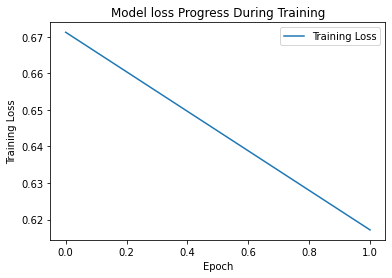

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Model loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

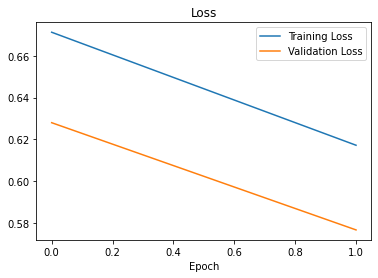

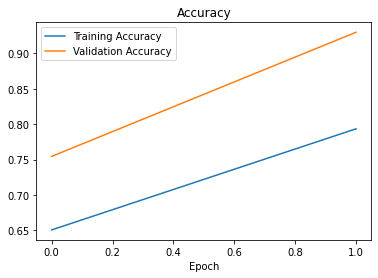

In [ ]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
plt.figure()
plt.title('Model loss Progress During Training')
plt.xlabel('Epoch')
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()
plt.figure()
plt.title('Model loss Progress During Training')
plt.xlabel('Epoch')
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_accuracy = dt_model.score(X_test, y_test)
dt_accuracy


0.9473684210526315

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=400, max_depth=10)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_accuracy = rf_model.score(X_test, y_test)
rf_accuracy

0.9298245614035088

In [ ]:
y_pred_lr = lr_model.predict(X_test)
y_pred_lr = (y_pred_lr > 0.5)
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

[[36  0]
 [ 1 20]]


In [ ]:
# clf = SVC(random_state=0)
# clf.fit(X_train, y_train)
# plot_confusion_matrix(cm_lr, y_test, y_pred_lr) 

In [ ]:
y_pred_dt = dt_model.predict(X_test)
y_pred_dt = (y_pred_dt > 0.5)
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

[[36  0]
 [ 3 18]]


In [ ]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf = (y_pred_rf > 0.5)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[35  1]
 [ 3 18]]


In [ ]:
k = X_test.shape[1]
n = len(X_test)
n

57

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
def errors(y_test,y_predict):
  rsme = float(format(np.sqrt(mean_squared_error(y_test,y_predict)),'.3f'))
  mse  = mean_squared_error(y_test, y_predict)
  mae  = mean_absolute_error(y_test, y_predict)
  r2   = r2_score(y_test, y_predict)
  adj_r2 = 1-((1-r2)*(n-1))/(n-k-1)
  print('RSME =',rsme)
  print('MSE =',mse)
  print('MAE =',mae)
  print('R2 =',r2)
  print('ADJ_R2 =',adj_r2)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, auc

y_score  = model.predict_proba(X_test)[:,0]
y_score1 = lr_model.predict_proba(X_test)[:,1]
y_score2 = dt_model.predict_proba(X_test)[:,1]
y_score3 = rf_model.predict_proba(X_test)[:,1]

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
fpr,  tpr,  th = roc_curve(y_test, y_score)
fpr1, tpr1, th1 = roc_curve(y_test, y_score1)
fpr2, tpr2, th2 = roc_curve(y_test, y_score2)
fpr3, tpr3, th3 = roc_curve(y_test, y_score3)

print('roc_auc_score for Artificial Neural Network: ', roc_auc_score(y_test, y_score))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score2))
print('roc_auc_score for RandomForest: ', roc_auc_score(y_test, y_score3))

roc_auc_score for Artificial Neural Network:  0.9576719576719577
roc_auc_score for Logistic Regression:  0.996031746031746
roc_auc_score for DecisionTree:  0.9285714285714286
roc_auc_score for RandomForest:  0.9801587301587301


In [ ]:
def F1Score(y_test, yhat):
  print(f1_score(y_test, yhat))

In [ ]:
y_ann_hat = model.predict(X_test)
y_lr_hat = lr_model.predict(X_test)
y_rf_hat = rf_model.predict(X_test)
y_dt_hat = dt_model.predict(X_test)

ValueError: ignored

In [ ]:
F1Score(y_test, y_lr_hat)

In [ ]:
F1Score(y_test, y_rf_hat)

In [ ]:
F1Score(y_test, y_dt_hat)

In [ ]:
lr_probs = dt_model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
yhat = dt_model.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.title('Precision Recall - DECISION TREE')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='LOGISTIC REGRESSION')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [ ]:
y_ann_predict = model.predict(X_test)
y_rf_predict = rf_model.predict(X_test)
y_lr_predict = lr_model.predict(X_test)
y_dt_predict = dt_model.predict(X_test)

In [ ]:
errors(y_ann_predict,y_test)

In [ ]:
errors(y_rf_predict,y_test)

In [ ]:
errors(y_lr_predict,y_test)

In [ ]:
errors(y_dt_predict,y_test)

RSME = 0.296
MSE = 0.08771929824561403
MAE = 0.08771929824561403
R2 = 0.623015873015873
ADJ_R2 = 0.18803418803418803


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import pydeck as pdk
import plotly.express as px